## Goal: We will use the UCI Bank Note Authentication Dataset for demystifying the confusion behind Confusion Matrix.

### UCI Dataset:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication

### We will predict and evaluate our model, and along the way develop our conceptual understanding.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [7]:
import os
import itertools
import warnings
warnings.filterwarnings("ignore")

## Understanding the data

### The dataset contains properties of the wavelet transformed image of 400x400 pixels of a bank note.

In [2]:
df = pd.read_csv('E:\\Python\\BankNote_Authentication.csv')
df.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
#Class is our target label, with zero indicating the bank note is forged and 1 indicating it is Legit
df['class'].value_counts() #Check if the data is equally balanced between the two classes for prediction

0    762
1    610
Name: class, dtype: int64

## Building the model

### Splitting the data into Training and Test set.
### Training set is the one on which we will be training our model and the evaluation will be performed on the Test set.

In [4]:
#Defining features and target variable
y = df['class']
X = df.drop(columns = ['class'])

#Splitting the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Next, we will make a simple Logistic Regression model for our prediction.

In [5]:
#Predicting using Logistic Regression for Binary Classification 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train) #Fitting the model 
y_pred = LR.predict(X_test) #Prediction 

## Model Evaluation
### Let us plot a simple Confusion Matrix

Confusion matrix, without normalization
[[189   2]
 [  2 150]]


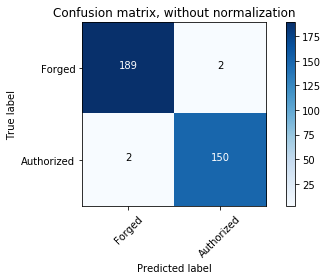

In [8]:
#Evaluation 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Forged','Authorized'],
                      title='Confusion matrix, without normalization')

In [9]:
#Extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  189
False Positives:  2
False Negatives:  2
True Positives:  150


## How accurate is our model?

In [10]:
#Accuracy (%) 
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%".format(Accuracy))

Accuracy 98.83%


## Does accuracy matter?

### Not always, it may not be the right measure at times, especially if your target class is not balanced (data is skewed). Then you may consider additional metrics like Precision, Recall, F Score (combined metric), but before diving in let us take a step back and understand the terms that form the basis for these.

### Some Basic Terms

### True Positive — Label which was predicted Positive (in our scenario Authenticated Bank Notes) and is actually Positive (i.e. belong to Positive ‘Authorized’ Class).

### True Negative — Label which was predicted Negative (in our scenario Forged Bank Notes) and is actually Negative (i.e. belong to Negative ‘Forged’ Class).

### False Positive — Label which was predicted as Positive, but is actually Negative, or in simple words the Note wrongly predicted as Authentic by our Model, but is actually Forged. In Hypothesis Testing it is also known as Type 1 Error or the incorrect rejection of Null Hypothesis, refer this to read more about Hypothesis testing.

### False Negatives — Labels which was predicted as Negative, but is actually Positive (Authentic Note predicted as Forged). It is also known as Type 2 Error, which leads to the failure in rejection of Null Hypothesis.

## Metrics beyond Accuracy
### Precision

### It is the ‘exactness’, ability of the model to return only relevant instances. If our use case/problem statement involves minimizing the False Positives, i.e. in current scenario if we don’t want the Forged Notes to be labelled as Authentic by the model then Precision is something we need.

In [11]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

Precision 0.99


### Recall

### It is the ‘Completeness’, ability of the model to identify all relevant instances, True Positive Rate, aka Sensitivity. In the current scenario if our focus is to have the least False Negatives i.e. we don’t Authentic Notes to be wrongly classified as Forged then Recall can come to our rescue.

In [12]:
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

Recall 0.99


### F1 Measure

### Harmonic mean of Precision & Recall, used to indicate a balance between Precision & Recall providing each equal weightage, it ranges from 0 to 1. F1 Score reaches its best value at 1 (perfect precision & recall) and worst at 0.

In [13]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.99


### F-Beta Measure

### It is the general form of F measure — Beta 0.5 & 2 are usually used as measures, 0.5 indicates the inclination towards Precision whereas 2 favors Recall giving it twice the weightage compared to precision.

In [14]:
#Fbeta score
def fbeta(precision, recall, beta):
    return ((1+pow(beta,2))*precision*recall)/(pow(beta,2)*precision + recall)
            
f2 = fbeta(Precision, Recall, 2)
f0_5 = fbeta(Precision, Recall, 0.5)

print("F2 {:0.2f}".format(f2))
print("\nF0.5 {:0.2f}".format(f0_5))

F2 0.99

F0.5 0.99


### Specificity

### It is also referred to as ‘True Negative Rate’ (Proportion of actual negatives that are correctly identified), i.e. more True Negatives the data hold the higher its Specificity.

In [15]:
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.99


### ROC (Receiver Operating Characteristic curve)

### The plot of ‘True Positive Rate’ (Sensitivity/Recall) against the ‘False Positive Rate’ (1-Specificity) at different classification thresholds.

### The area under the ROC curve (AUC ) measures the entire two-dimensional area underneath the curve. It is a measure of how well a parameter can distinguish between two diagnostic groups. Often used as a measure of quality of the classification models.

### A random classifier has an area under the curve of 0.5, while AUC for a perfect classifier is equal to 1.

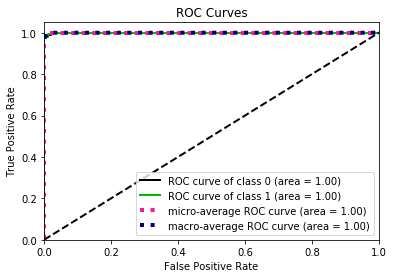

In [27]:
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba = LR.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

## Conclusion


### If its about finding that ‘spam in your mailbox’, high precision of our model will be of much importance (as we don’t want the ham to be labelled as spam).

### It will tell us what proportion of messages we classified as spam, actually were spam. 

### Ratio of true positives (words classified as spam, and which are actually spam) to all positives (all words classified as spam, irrespective of whether that was the correct classification).

### While in fraud detection we may wish our Recall to be higher, so that we can correctly classify/identify the frauds even if we miss to classify some of the non-fraudulent activity as fraud, it won’t cause any significant damage.